<a href="https://colab.research.google.com/github/sakshisinghh28/Recommendation-system./blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-surprise
import pandas as pd
from surprise import Dataset, Reader, SVD, dump
from surprise.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357222 sha256=ed7f1466a8b14c2b75ce09375f505eb14cc04327871792afb35d497f34fa7327
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -uq "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive/Movie"

In [5]:
!ls "/content/drive/My Drive/Movie"


genome_scores.csv  genome_tags.csv  link.csv  movie.csv  rating.csv  tag.csv


In [6]:
import pandas as pd
import os

# Define the directory path
path = "/content/drive/My Drive/Movie/"

# List the expected file names based on your description
expected_files = ["genome_scores.csv", "genome_tags.csv", "link.csv", "movie.csv", "rating.csv", "tag.csv"]

# Verify each file exists and load into DataFrame
for file_name in expected_files:
    file_path = os.path.join(path, file_name)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Loaded {file_name}")
        print(df.head())
    else:
        print(f"File {file_name} does not exist in the specified directory.")


Loaded genome_scores.csv
   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675
Loaded genome_tags.csv
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
Loaded link.csv
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
Loaded movie.csv
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|F

In [7]:
import os

path = "/content/drive/My Drive/Movie/"
files = os.listdir(path)
print(files)


['genome_scores.csv', 'movie.csv', 'rating.csv', 'link.csv', 'genome_tags.csv', 'tag.csv']


In [8]:
import pandas as pd

# Define the directory path
path = "/content/drive/My Drive/Movie/"

# Load ratings.csv into a DataFrame
ratings_file = "rating.csv"  # Note the correct file name here
ratings = pd.read_csv(path + ratings_file)

# Display the first few rows of the DataFrame
print(ratings.head())


   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


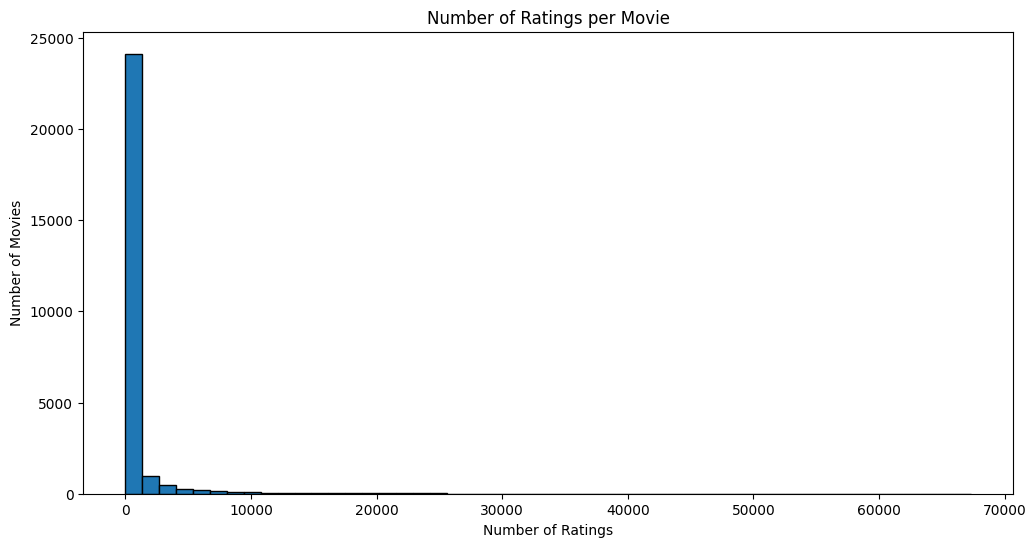

In [9]:
#Doing some Exploratory data analysis
import matplotlib.pyplot as plt

ratings_per_movie = ratings.groupby('movieId').size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_movie, bins=50, edgecolor='k')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Ratings per Movie')
plt.show()

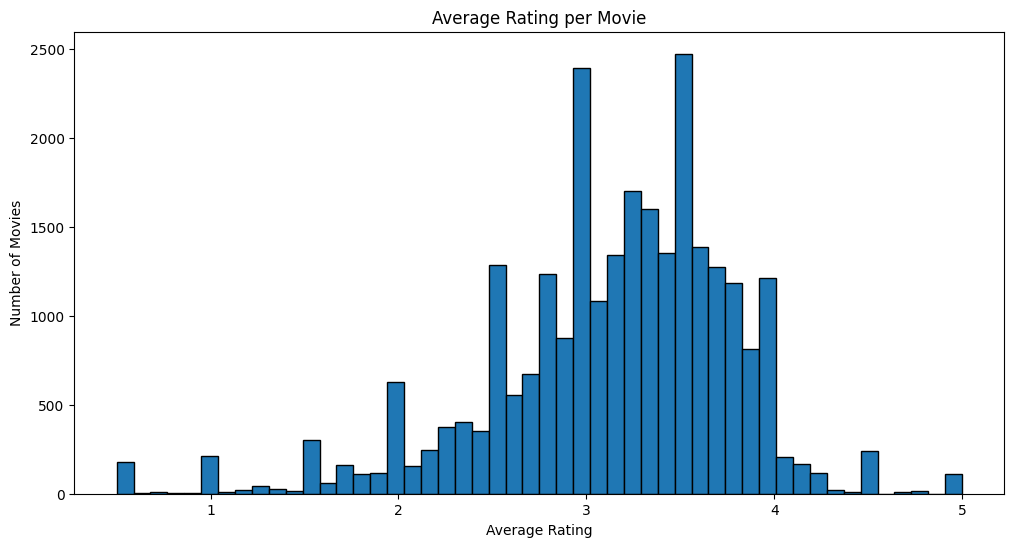

In [10]:
# Average Rating per Movie
average_rating = ratings.groupby('movieId')['rating'].mean()
average_rating = average_rating.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.hist(average_rating, bins=50, edgecolor='k')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.title('Average Rating per Movie')
plt.show()


In [11]:
#Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming ratings DataFrame is already loaded
# and you have a movies.csv file similar to ratings.csv

# 1. Load the movies DataFrame
movies_file = "movie.csv"  # Assuming you have a movies.csv file
movies = pd.read_csv(path + movies_file) # Use 'path' defined earlier

# 2. Handle Missing Data
print(ratings.isnull().sum())
print(movies.isnull().sum()) # Now 'movies' is defined
ratings = ratings.dropna()
movies = movies.dropna()

# 3. Data Normalization
scaler = StandardScaler()
ratings['rating'] = scaler.fit_transform(ratings[['rating']])

# 4. Feature Engineering
average_rating = ratings.groupby('movieId')['rating'].mean()
movies = pd.merge(movies, average_rating, on='movieId', how='left')
movies.rename(columns={'rating': 'avg_rating'}, inplace=True)

# 5. Data Splitting (Optional)
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# 6. Data Cleaning (if needed)
ratings = ratings[ratings['rating'] >= 1]

# Print summary or check final datasets
print(ratings.head())
print(movies.head())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64
     userId  movieId    rating            timestamp
131       1     4993  1.401604  2005-04-02 23:31:22
142       1     5952  1.401604  2005-04-02 23:30:19
158       1     7153  1.401604  2005-04-02 23:30:33
170       1     8507  1.401604  2004-09-10 03:13:47
176       2       62  1.401604  2000-11-21 15:29:58
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  avg_rating  
0  Adventure|Animation|Children|Comedy|Fantasy    0.376155  
1                   Adventure|Children|Fantasy   -0.298056  
2                               Comedy|Romance   -0.355981  
3                 